# Surface to Volume Ratio
The surface to volume ratio is a measure of how much surface area an object has relative to its volume. It is a very important to the cells as it affects the rate of heat exchange, chemical exchange, and other processes.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

my_path = os.path.abspath(os.path.dirname(''))
print('the working directory is:', my_path)

the working directory is: /Users/ericxin/Downloads/Bio_cells


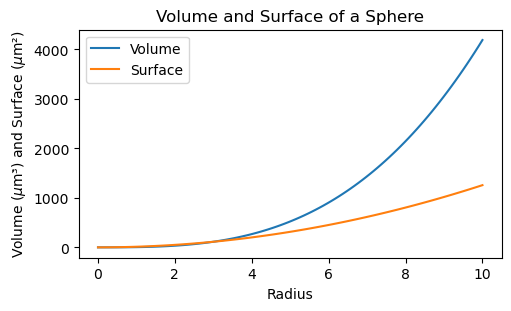

In [16]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

def Volume(x):
    return 4/3 * np.pi * x**3

def Surface(x):
    return 4 * np.pi * x**2

ax.plot(x, Volume(x), label='Volume')
ax.plot(x, Surface(x), label='Surface')

ax.set_xlabel('Radius')
ax.set_ylabel('Volume ($\mu$m³) and Surface ($\mu$m²)')

ax.set_title('Volume and Surface of a Sphere')
ax.legend()

plt.show()
# plt.savefig(my_path + 'sphere.png')

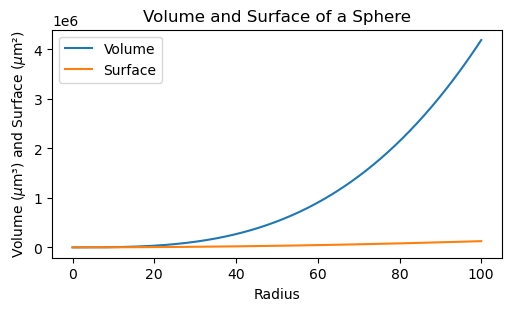

In [17]:
x = np.linspace(0, 100, 500)

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

def Volume(x):
    return 4/3 * np.pi * x**3

def Surface(x):
    return 4 * np.pi * x**2

ax.plot(x, Volume(x), label='Volume')
ax.plot(x, Surface(x), label='Surface')

ax.set_xlabel('Radius')
ax.set_ylabel('Volume ($\mu$m³) and Surface ($\mu$m²)')

ax.set_title('Volume and Surface of a Sphere')
ax.legend()

plt.show()
# plt.savefig(my_path + 'sphere.png')

# Diffusion Model and Osmosis
Here is a simple model of thermodynamic movement and sketch of basic functions for osmosis.

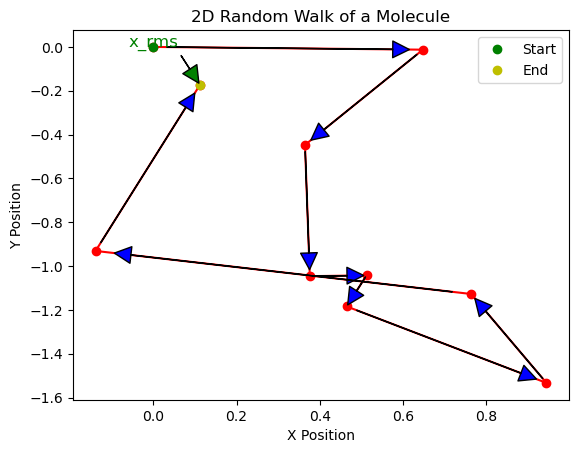

In [18]:
# use matplot lib to simulate the movement of a molecule in a 2D space and plot the trajectory, and the distance from the origin

# set a random seed for reproducibility
np.random.seed(1024)

# define the number of steps
nsteps = 10

# create an array of zeros to store the x and y positions
x = np.zeros(nsteps)
y = np.zeros(nsteps)

# loop over the number of steps
for i in range(1, nsteps):
    dis = np.random.rand()
    angle = 2 * np.pi * np.random.rand()

    x[i] = x[i-1] + dis * np.cos(angle)
    y[i] = y[i-1] + dis * np.sin(angle)

# plot the trajectory
plt.plot(x, y, 'ro-')

# add arrows for each movement
for i in range(1, nsteps):
    plt.annotate('', xy=(x[i], y[i]), xytext=(x[i-1], y[i-1]),
                 arrowprops=dict(facecolor='blue', shrink=0.05, width=0.05))

plt.annotate('x_rms', xy=(x[-1], y[-1]), xytext=(0, 0),
             arrowprops=dict(facecolor='green', shrink=0.05, width=0.05),
             fontsize=12, color='green', ha='center')

# mark the start and end points
plt.plot(x[0], y[0], 'go', label='Start')
plt.plot(x[-1], y[-1], 'yo', label='End')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Random Walk of a Molecule')
plt.show()

The equation of diffusion:

x_rms = sqrt(2 * D * t)

where x_rms is the root mean square distance, D is the diffusion coefficient, and t is the time.

This equation is derived by considering the random walk of a particle in a fluid. The particle moves in a random direction with a step size of sqrt(2 * D * dt), where dt is the time step. The particle moves in 3D, so the distance moved in time dt is sqrt(2 * D * dt) in each of the three dimensions. The root mean square distance is the square root of the sum of the squares of the distances moved in each dimension.

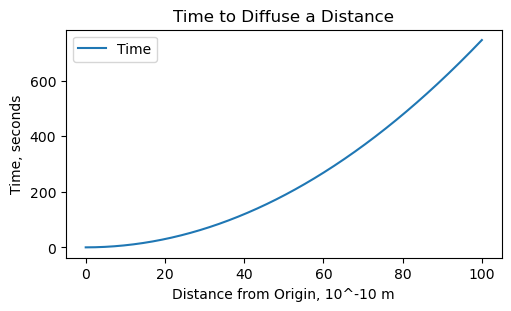

In [19]:
x = np.linspace(0, 100, 500)

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

d_constant = 6.7
# 6.7 * 10**-10 for Glucose in water at 25C

def time (x):
    return x**2 / (2 * d_constant)

ax.plot(x, time(x), label='Time')

ax.set_xlabel('Distance from Origin, 10^-10 m')
ax.set_ylabel('Time, seconds')

ax.set_title('Time to Diffuse a Distance')
ax.legend()

plt.show()

# Read data

In [20]:
import pandas as pd 

file = my_path + '/data/' + '41559_2022_1833_MOESM4_ESM.xlsx'

# data = pd.read_excel(file)
data = pd.ExcelFile(file)

# print(data.head())
data.sheet_names

['Source Data Fig. 2a', 'Source Data Fig. 2b', 'Source Data Fig. 2c']

In [21]:
data = pd.read_excel(file)
print(data.head())

  Source Data Figure 2a. Cell volumes for a phylogenetically diverse set of prokaryotes and eukaryotes.  \
0                                            Species                                                      
1                             Acholeplasma laidlawii                                                      
2                               Aerobacter aerogenes                                                      
3                           Alteromonas haloplanktis                                                      
4                           Arthrobacter globiformis                                                      

  Unnamed: 1 Unnamed: 2         Unnamed: 3  \
0    Group_1    Group_2  Cell volume (µm3)   
1   Bacteria        NaN              0.143   
2   Bacteria        NaN                3.3   
3   Bacteria        NaN           0.909091   
4   Bacteria        NaN              0.505   

                                Unnamed: 4 Unnamed: 5  
0                       

# Analysis of cell volumes of prokaryotes and eukaryotes

In [22]:
import pandas as pd 

file = my_path + '/data/' + '41559_2022_1833_MOESM4_ESM.xlsx'

data = pd.read_excel(file, sheet_name='Source Data Fig. 2a')

print(data.head())

  Source Data Figure 2a. Cell volumes for a phylogenetically diverse set of prokaryotes and eukaryotes.  \
0                                            Species                                                      
1                             Acholeplasma laidlawii                                                      
2                               Aerobacter aerogenes                                                      
3                           Alteromonas haloplanktis                                                      
4                           Arthrobacter globiformis                                                      

  Unnamed: 1 Unnamed: 2         Unnamed: 3  \
0    Group_1    Group_2  Cell volume (µm3)   
1   Bacteria        NaN              0.143   
2   Bacteria        NaN                3.3   
3   Bacteria        NaN           0.909091   
4   Bacteria        NaN              0.505   

                                Unnamed: 4 Unnamed: 5  
0                       

In [23]:
print(data.columns)

Index(['Source Data Figure 2a. Cell volumes for a phylogenetically diverse set of prokaryotes and eukaryotes.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [24]:
volume = data['Unnamed: 3']
type = data['Unnamed: 1']

type = type[(type == 'Bacteria') | (type == 'Eukaryotes')]
volume = volume[type.index] # only keep the values that are bacteria or eukaryote

print(volume)
print(type)

1         0.143
2           3.3
3      0.909091
4         0.505
5      0.909091
         ...   
241    8.177083
242    4.186667
243       14.13
244       14.13
245    8.177083
Name: Unnamed: 3, Length: 244, dtype: object
1        Bacteria
2        Bacteria
3        Bacteria
4        Bacteria
5        Bacteria
          ...    
241    Eukaryotes
242    Eukaryotes
243    Eukaryotes
244    Eukaryotes
245    Eukaryotes
Name: Unnamed: 1, Length: 244, dtype: object


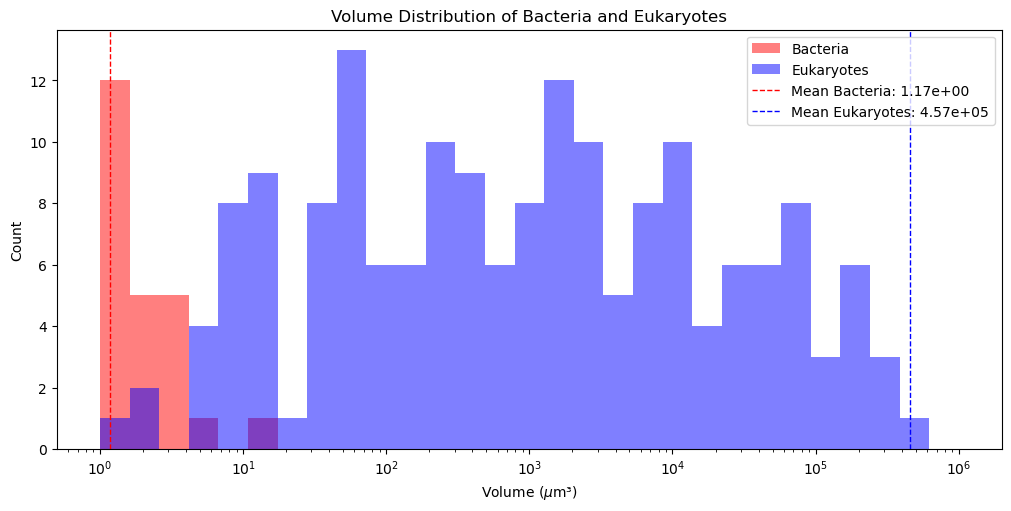

In [25]:
# eukaryote = blue, bacteria = red
# Histogram of the volume of bacteria and eukaryotes with log scale

n_bins = 30 #number of bins

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create logarithmically spaced bins
bins = np.logspace(0, 6, n_bins)

ax.hist(volume[type == 'Bacteria'], color='red', alpha=0.5, label='Bacteria', bins=bins)
ax.hist(volume[type == 'Eukaryotes'], color='blue', alpha=0.5, label='Eukaryotes', bins=bins)

# Calculate and mark the mean size
mean_bacteria = volume[type == 'Bacteria'].mean()
mean_eukaryotes = volume[type == 'Eukaryotes'].mean()

ax.axvline(mean_bacteria, color='red', linestyle='dashed', linewidth=1, label=f'Mean Bacteria: {mean_bacteria:.2e}')
ax.axvline(mean_eukaryotes, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Eukaryotes: {mean_eukaryotes:.2e}')

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Count')
ax.set_title('Volume Distribution of Bacteria and Eukaryotes')

ax.legend()

plt.show()

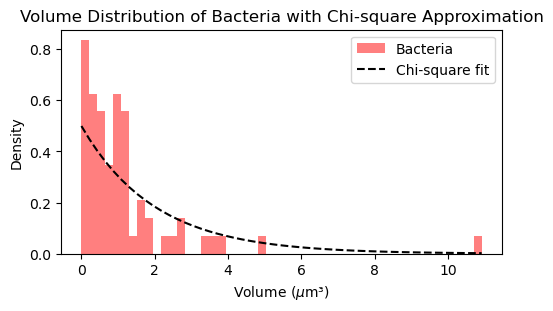

In [26]:
from scipy.stats import chi2

n_bins = 50 #number of bins

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

# Plot the histogram
counts, bins, patches = ax.hist(volume[type == 'Bacteria'], color='red', alpha=0.5, label='Bacteria', bins=n_bins, density=True)

# Fit a chi-square distribution to the data
df = 2  # degrees of freedom, you might need to adjust this
chi2_fit = chi2.pdf(bins, df)

# Plot the chi-square approximation
ax.plot(bins, chi2_fit, 'k--', label='Chi-square fit')

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Density')
ax.set_title('Volume Distribution of Bacteria with Chi-square Approximation')

ax.legend()

plt.show()

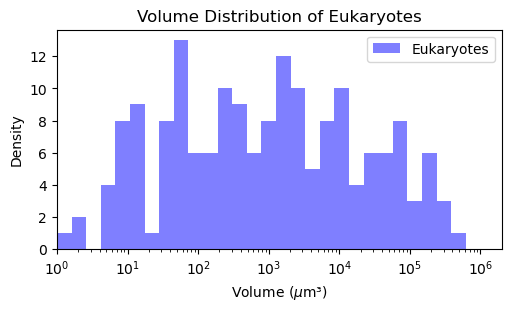

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 30  # number of bins

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

eu_cells = volume[type == 'Eukaryotes']
# eu_cells = eu_cells[eu_cells < 10**6]

# Create logarithmically spaced bins
bins = np.logspace(0, 6, n_bins)

# Plot the histogram
ax.hist(eu_cells, color='blue', alpha=0.5, label='Eukaryotes', bins=bins)

ax.set_xscale('log')
ax.set_xlim(left=1)  # Set the log scale to start from 1

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Density')
ax.set_title('Volume Distribution of Eukaryotes')

ax.legend()

plt.show()

Note: `bins = np.logspace(0, 6, n_bins)` creates a logarithmically spaced array of bins from 10^0 to 10^6. 

The `left=1` argument in `ax.set_xlim(left=1)` ensures that the log scale starts from 1 instead of 0. This is useful when dealing with volumes or sizes that cannot be zero.

# Analysis of Genome size of prokaryotes and eukaryotes

In [28]:
data = pd.read_excel(file, sheet_name='Source Data Fig. 2b')

print(data.head())

  Source Data Figure 2b. Genome sizes for a phylogenetically diverse set of prokaryotes and eukaryotes.  \
0                                            Species                                                      
1                     Mycoplasma parvum str. Indiana                                                      
2                          Mycoplasma genitalium G37                                                      
3  Blattabacterium sp. (Cryptocercus punctulatus)...                                                      
4  Buchnera aphidicola str. Bp (Baizongia pistaciae)                                                      

                 Unnamed: 1                                       Unnamed: 2  \
0                    Strain                                          Group_1   
1                   Indiana         Bacteria;Terrabacteria group;Tenericutes   
2                      G-37         Bacteria;Terrabacteria group;Tenericutes   
3                       Cpu  Bacteria

In [29]:
size = data['Unnamed: 5']
type = data['Unnamed: 4']
detailed_type = data['Unnamed: 3']

type = type[(type == 'Prokaryotes') | (type == 'Eukaryotes')]
size = size[type.index]
detailed_type = detailed_type[type.index]

eu_size = size[type == 'Eukaryotes']
pro_size = size[type == 'Prokaryotes']

eu_size = pd.to_numeric(eu_size, errors='coerce')
pro_size = pd.to_numeric(pro_size, errors='coerce')

In [30]:
# find if there is any np.inf in the data
eu_size_numeric = pd.to_numeric(eu_size, errors='coerce') # convert to numeric, set errors to coerce to replace errors with NaN
print(np.isinf(eu_size_numeric).sum())

0


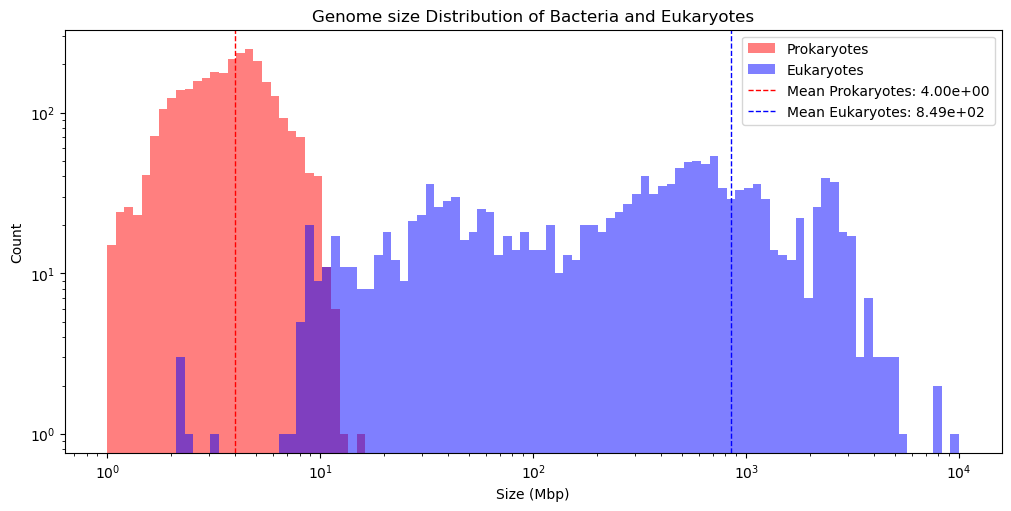

In [31]:
# eukaryote = blue, bacteria = red
# Histogram of the volume of bacteria and eukaryotes with log scale

n_bins = 100 #number of bins

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create logarithmically spaced bins
bins = np.logspace(0, 4, n_bins)

ax.hist(pro_size, color='red', alpha=0.5, label='Prokaryotes', bins=bins)
ax.hist(eu_size, color='blue', alpha=0.5, label='Eukaryotes', bins=bins)

# Calculate and mark the mean size
mean_pro = pro_size.mean()
mean_eu = eu_size.mean()

ax.axvline(mean_pro, color='red', linestyle='dashed', linewidth=1, label=f'Mean Prokaryotes: {mean_pro:.2e}')
ax.axvline(mean_eu, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Eukaryotes: {mean_eu:.2e}')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Size (Mbp)')
ax.set_ylabel('Count')
ax.set_title('Genome size Distribution of Bacteria and Eukaryotes')

ax.legend()

plt.show()

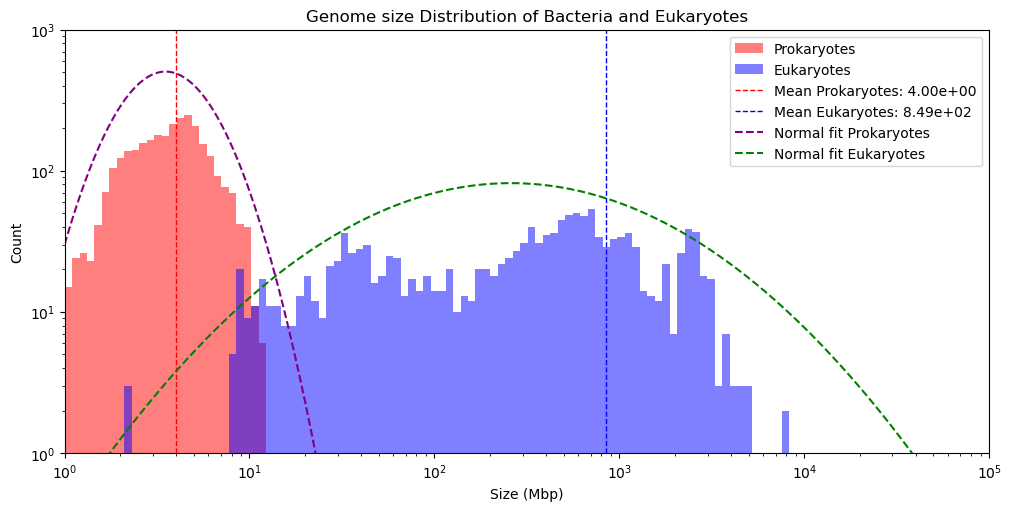

In [32]:
from scipy.stats import norm

# eukaryote = blue, bacteria = red
# Histogram of the volume of bacteria and eukaryotes with log scale

n_bins = 100  # number of bins

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create logarithmically spaced bins
bins = np.logspace(0, 4, n_bins)

# Plot the histograms
ax.hist(pro_size, color='red', alpha=0.5, label='Prokaryotes', bins=bins)
ax.hist(eu_size, color='blue', alpha=0.5, label='Eukaryotes', bins=bins)

# Calculate and mark the mean size
mean_pro = pro_size.mean()
mean_eu = eu_size.mean()

ax.axvline(mean_pro, color='red', linestyle='dashed', linewidth=1, label=f'Mean Prokaryotes: {mean_pro:.2e}')
ax.axvline(mean_eu, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Eukaryotes: {mean_eu:.2e}')

# Fit a normal distribution to the log-transformed data
log_pro_size = np.log10(pro_size)
log_eu_size = np.log10(eu_size)

# Fit normal distribution
mu_pro, std_pro = norm.fit(log_pro_size)
mu_eu, std_eu = norm.fit(log_eu_size)

# Plot the normal distribution curves
x = np.linspace(0, 10, 1000)
pro_pdf = norm.pdf(x, mu_pro, std_pro)
eu_pdf = norm.pdf(x, mu_eu, std_eu)

ax.plot(10**x, pro_pdf * len(pro_size) * (bins[1] - bins[0]), color='purple', linestyle='--', label='Normal fit Prokaryotes')
ax.plot(10**x, eu_pdf * len(eu_size) * (bins[1] - bins[0]), color='green', linestyle='--', label='Normal fit Eukaryotes')

ax.set_xscale('log')
ax.set_xbound(1, 10**5)
ax.set_yscale('log')
ax.set_ybound(1, 10**3)

ax.set_xlabel('Size (Mbp)')
ax.set_ylabel('Count')
ax.set_title('Genome size Distribution of Bacteria and Eukaryotes')

ax.legend()

plt.show()

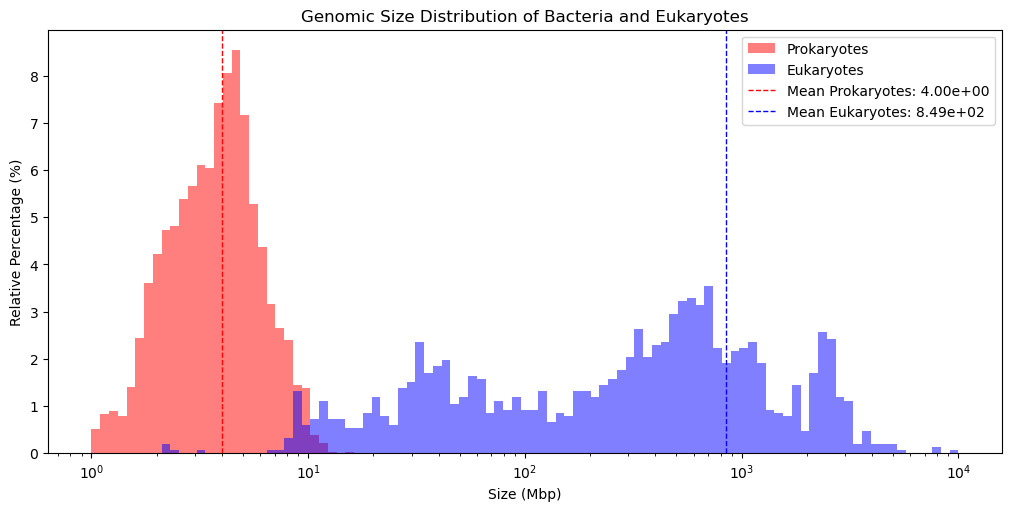

In [33]:
# eukaryote = blue, bacteria = red
# Histogram of the volume of bacteria and eukaryotes with log scale

n_bins = 100  # number of bins

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create logarithmically spaced bins
bins = np.logspace(0, 4, n_bins)

# Calculate the histogram data
pro_counts, _ = np.histogram(pro_size, bins=bins)
eu_counts, _ = np.histogram(eu_size, bins=bins)

# Normalize to get the relative percentage
pro_counts = pro_counts / pro_counts.sum() * 100
eu_counts = eu_counts / eu_counts.sum() * 100

# Plot the histograms
ax.hist(bins[:-1], bins, weights=pro_counts, color='red', alpha=0.5, label='Prokaryotes')
ax.hist(bins[:-1], bins, weights=eu_counts, color='blue', alpha=0.5, label='Eukaryotes')

# Calculate and mark the mean size
mean_pro = pro_size.mean()
mean_eu = eu_size.mean()

ax.axvline(mean_pro, color='red', linestyle='dashed', linewidth=1, label=f'Mean Prokaryotes: {mean_pro:.2e}')
ax.axvline(mean_eu, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Eukaryotes: {mean_eu:.2e}')

ax.set_xscale('log')

ax.set_xlabel('Size (Mbp)')
ax.set_ylabel('Relative Percentage (%)')
ax.set_title('Genomic Size Distribution of Bacteria and Eukaryotes')

ax.legend()

plt.show()

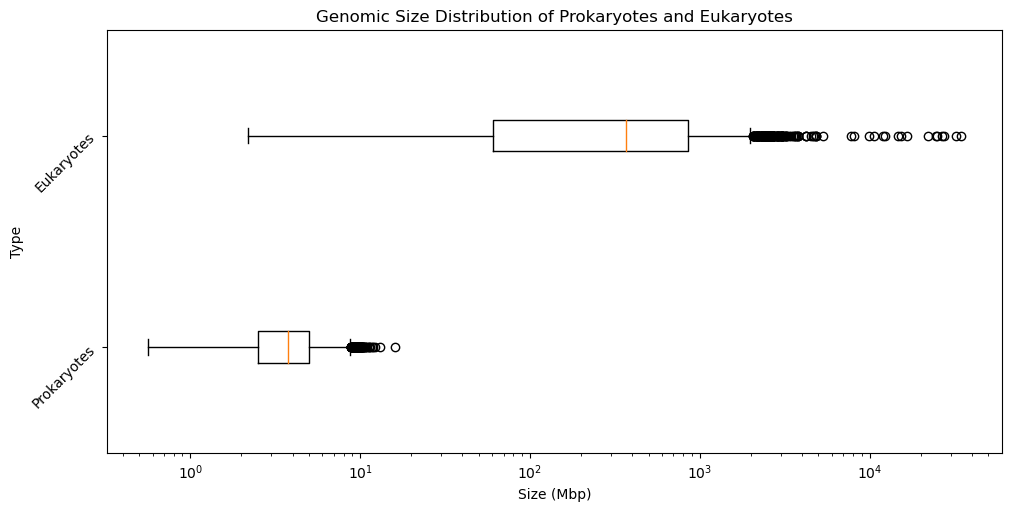

In [34]:
# Box plot of the genome size of bacteria and eukaryotes

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create a box plot with vertical orientation
ax.boxplot([pro_size, eu_size], labels=['Prokaryotes', 'Eukaryotes'], vert=False)

ax.set_xscale('log')

ax.set_ylabel('Type')
ax.set_xlabel('Size (Mbp)')
ax.set_title('Genomic Size Distribution of Prokaryotes and Eukaryotes')

plt.yticks(rotation=45)
plt.show()

# One step further: Archaea, Bacteria, and Eukaryotes

In [35]:
size = data['Unnamed: 5']
type = data['Unnamed: 3']

In [36]:
# Find all unique values in the type column
unique_types = type.unique()
print(unique_types)

['Group_2' 'Bacteria' 'Archaea' 'Fungi' 'Protists' 'Plants' 'Other'
 'Animals']


In [37]:
# divide the data into different dataframes based on the type
unique_types = unique_types[~pd.isnull(unique_types)]  # remove NaN values
unique_types = unique_types[unique_types != 'Group_2']  # remove the header

dataframes = {}
for unique_type in unique_types:
    dataframes[unique_type] = size[type == unique_type]

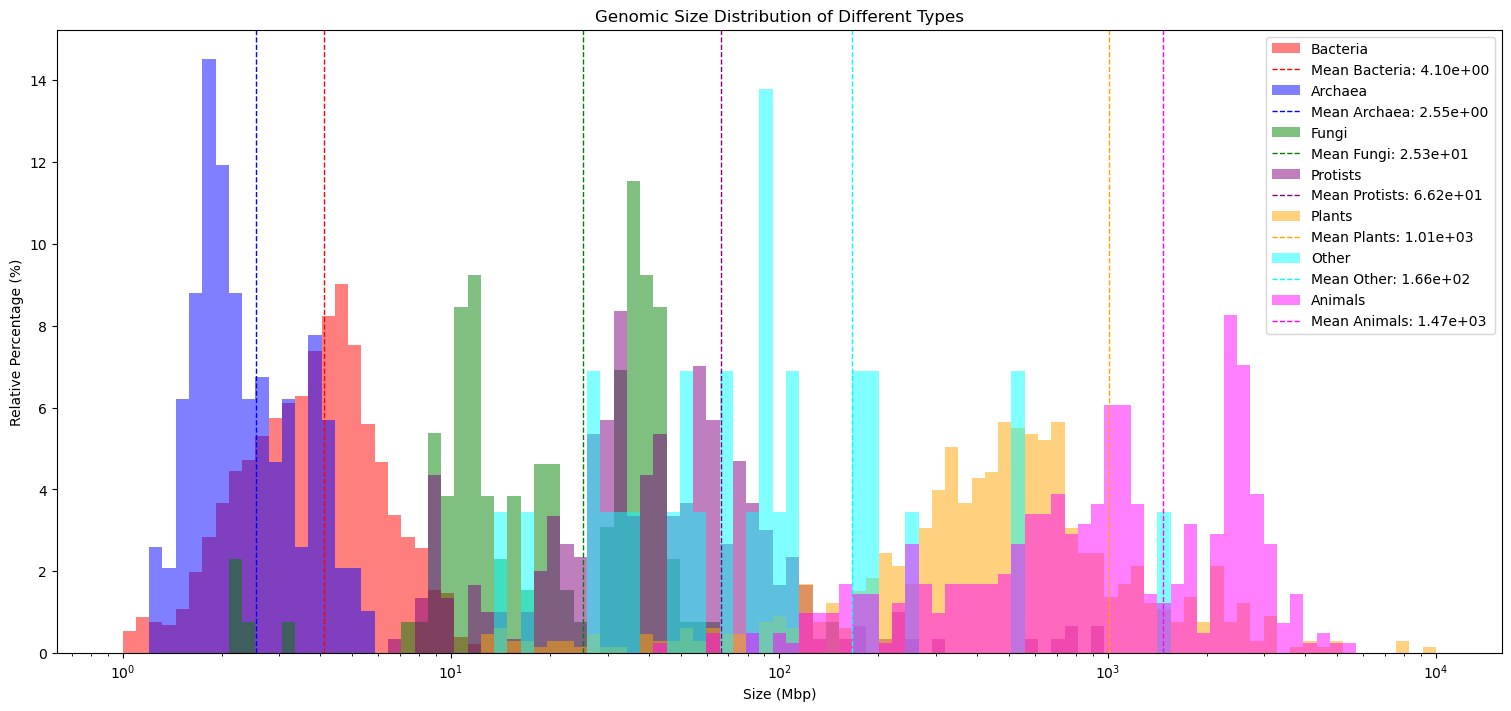

In [38]:
# Histogram of the genome size of different types with log scale

n_bins = 100  # number of bins

fig, ax = plt.subplots(figsize=(15, 7), layout='constrained')

# Create logarithmically spaced bins
bins = np.logspace(0, 4, n_bins)

# Define colors for each type
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Plot the histograms for each type
for i, (unique_type, df) in enumerate(dataframes.items()):
    counts, _ = np.histogram(df, bins=bins)
    counts = counts / counts.sum() * 100  # Normalize to get the relative percentage
    ax.hist(bins[:-1], bins, weights=counts, color=colors[i % len(colors)], alpha=0.5, label=unique_type)

    # Calculate and mark the mean size
    mean_size = df.mean()
    ax.axvline(mean_size, color=colors[i % len(colors)], linestyle='dashed', linewidth=1, label=f'Mean {unique_type}: {mean_size:.2e}')

ax.set_xscale('log')

ax.set_xlabel('Size (Mbp)')
ax.set_ylabel('Relative Percentage (%)')
ax.set_title('Genomic Size Distribution of Different Types')

ax.legend()

plt.show()


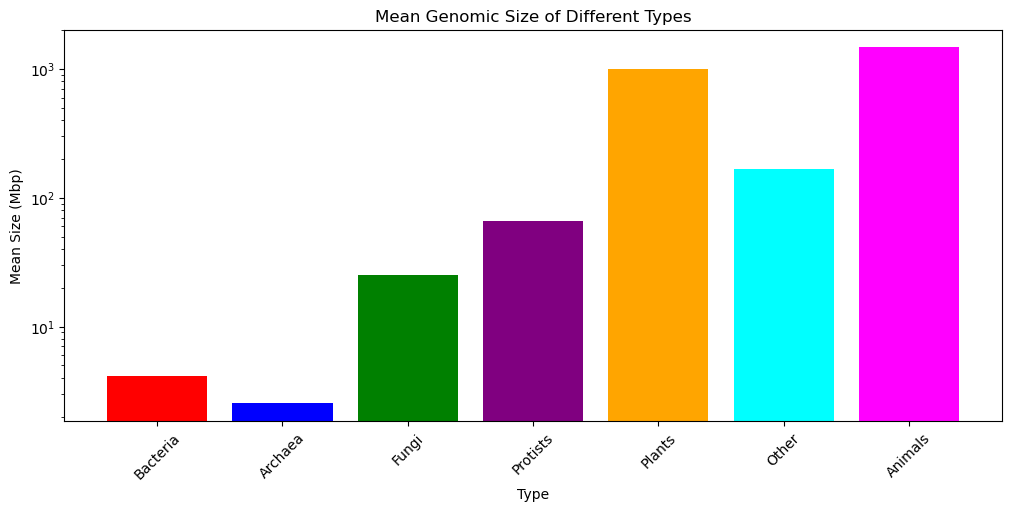

In [39]:
# Extract the mean sizes for each type
mean_sizes = {unique_type: df.mean() for unique_type, df in dataframes.items()}

# Plot the means on an axis
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create a bar plot
ax.bar(mean_sizes.keys(), mean_sizes.values(), color=colors[:len(mean_sizes)])

ax.set_yscale('log')

ax.set_xlabel('Type')
ax.set_ylabel('Mean Size (Mbp)')
ax.set_title('Mean Genomic Size of Different Types')

plt.xticks(rotation=45)
plt.show()

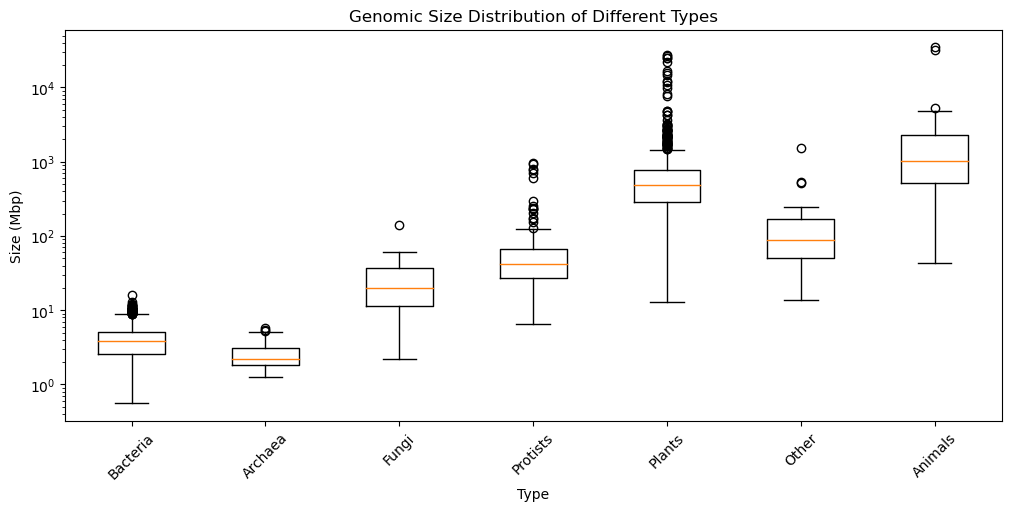

In [40]:
# Plot the box plot for each type
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Create a box plot
ax.boxplot([df for df in dataframes.values()], labels=dataframes.keys())

ax.set_yscale('log')

ax.set_xlabel('Type')
ax.set_ylabel('Size (Mbp)')
ax.set_title('Genomic Size Distribution of Different Types')

plt.xticks(rotation=45)
plt.show()


# Cell volume and ribosome count

In [41]:
data = pd.read_excel(my_path + '/data/' + 'elife-20437-fig2-data1.xlsx')
print(data.head())

  Source datafor Figure 2 for Lynch and Marinov. Cell volumes (column C) and estimated numbers of ribosomes per cell (column F), mostly obtained as direct estimates taken from microscopic examinations, and in a few cases from proteomic estimates by averaging of  \
0  cell-specific estimates for each ribosomal pro...                                                                                                                                                                                                                    
1  Full details (the complete reference plus the ...                                                                                                                                                                                                                    
2                                                NaN                                                                                                                                                         

/opt/homebrew/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [42]:
xsl = pd.read_excel(my_path + '/data/' + 'elife-20437-fig2-data1.xlsx', sheet_name='Figure 2-source data')
print(xsl.head())

  Source datafor Figure 2 for Lynch and Marinov. Cell volumes (column C) and estimated numbers of ribosomes per cell (column F), mostly obtained as direct estimates taken from microscopic examinations, and in a few cases from proteomic estimates by averaging of  \
0  cell-specific estimates for each ribosomal pro...                                                                                                                                                                                                                    
1  Full details (the complete reference plus the ...                                                                                                                                                                                                                    
2                                                NaN                                                                                                                                                         

/opt/homebrew/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [43]:
# remove columns
columns_to_drop = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7']
existing_columns_to_drop = [col for col in columns_to_drop if col in xsl.columns]
xsl.drop(columns=existing_columns_to_drop, inplace=True)

# rename columns
xsl.columns = ['Name', 'Volume', 'Ribosome']

print(xsl.head())

                                                Name  Volume   Ribosome
0  cell-specific estimates for each ribosomal pro...     NaN        NaN
1  Full details (the complete reference plus the ...     NaN        NaN
2                                                NaN     NaN        NaN
3                                                NaN    Cell  Ribosomes
4                                                NaN  Volume   per cell


In [44]:
current_type = 'NaN'
def get_type(name):
    # current_type = 'NaN'
    global current_type
    if isinstance(name, str):
        if 'Archaea' in name:
            current_type = 'Archaea'
        elif 'Bacteria:' in name:
            current_type = 'Bacteria'
        elif 'Unicellular eukaryotes:' in name:
            current_type = 'Eukaryote'
        elif 'Plants:' in name:
            current_type = 'Eukaryote'
        elif 'Mammals:' in name:
            current_type = 'Eukaryote'
    
    return current_type

# FILEPATH: /Users/ericxin/Downloads/plot.ipynb
xsl['Name'] = xsl['Name'].apply(get_type)

In [45]:
data = xsl[xsl['Ribosome'].apply(str).str.isdigit()]

print(data.head())

        Name Volume Ribosome
9   Bacteria  1.443     6000
17  Bacteria  0.934    27529
29  Bacteria   0.58     7400
31  Bacteria   0.22     4122
35  Bacteria   0.05      209


In [46]:
# save xsl to a new file
data.to_csv(my_path + '/data/' + 'volume_and_ribosome.csv', index=False)

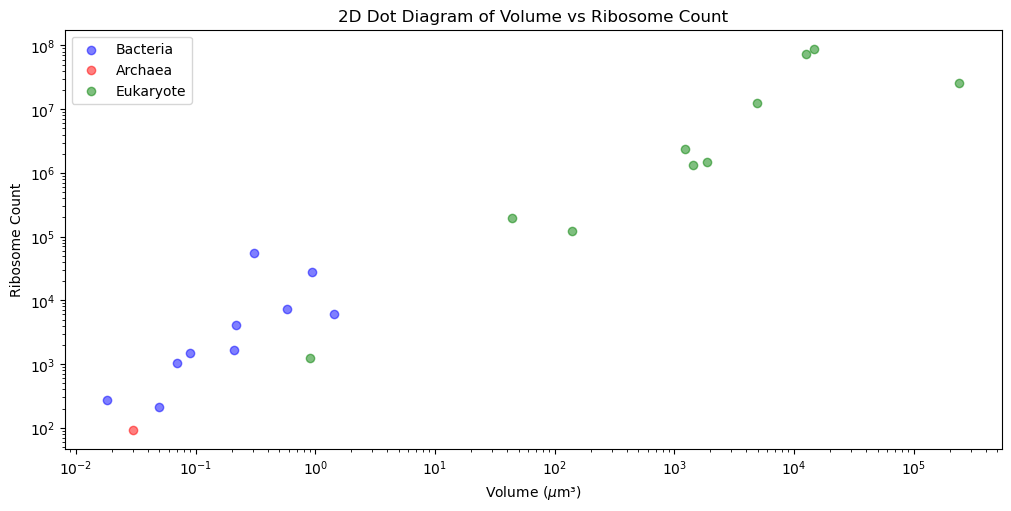

In [47]:
# Define colors for each type
colors = {'Archaea': 'red', 'Bacteria': 'blue', 'Eukaryote': 'green'}

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

for t in data['Name'].unique():
    subset = data[data['Name'] == t]
    ax.scatter(subset['Volume'], subset['Ribosome'], label=t, color=colors[t], alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Ribosome Count')
ax.set_title('2D Dot Diagram of Volume vs Ribosome Count')

ax.legend()

plt.show()

/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_82907/2022292658.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_82907/2022292658.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ribosome'] = pd.to_numeric(data['Ribosome'], errors='coerce')


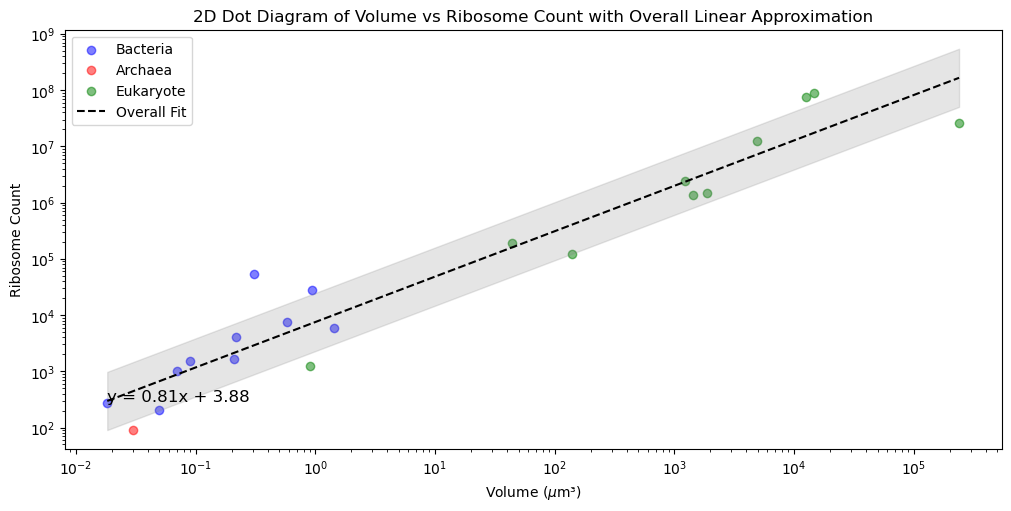

In [48]:
# Define colors for each type
colors = {'Archaea': 'red', 'Bacteria': 'blue', 'Eukaryote': 'green'}

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

# Scatter plot for each type
for t in data['Name'].unique():
    subset = data[data['Name'] == t]
    ax.scatter(subset['Volume'], subset['Ribosome'], label=t, color=colors[t], alpha=0.5)

# Ensure columns are numeric
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['Ribosome'] = pd.to_numeric(data['Ribosome'], errors='coerce')

# Fit a linear model to all data
log_volume = np.log10(data['Volume'])
log_ribosome = np.log10(data['Ribosome'])
coeffs = np.polyfit(log_volume, log_ribosome, 1)
fit_line = np.poly1d(coeffs)

# Plot the linear fit
x_fit = np.linspace(log_volume.min(), log_volume.max(), 100)
y_fit = fit_line(x_fit)
ax.plot(10**x_fit, 10**y_fit, color='black', linestyle='--', label='Overall Fit')

# Calculate error bounds
y_fit_upper = y_fit + np.std(log_ribosome - fit_line(log_volume))
y_fit_lower = y_fit - np.std(log_ribosome - fit_line(log_volume))
ax.fill_between(10**x_fit, 10**y_fit_lower, 10**y_fit_upper, color='gray', alpha=0.2)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Ribosome Count')
ax.set_title('2D Dot Diagram of Volume vs Ribosome Count with Overall Linear Approximation')

# Show the formula of the linear fit
ax.text(10**x_fit.min(), 10**y_fit.min(), f'y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}', fontsize=12)

ax.legend()

plt.show()

/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_82907/1683167132.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Volume'] = pd.to_numeric(subset['Volume'], errors='coerce')
/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_82907/1683167132.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Ribosome'] = pd.to_numeric(subset['Ribosome'], errors='coerce')


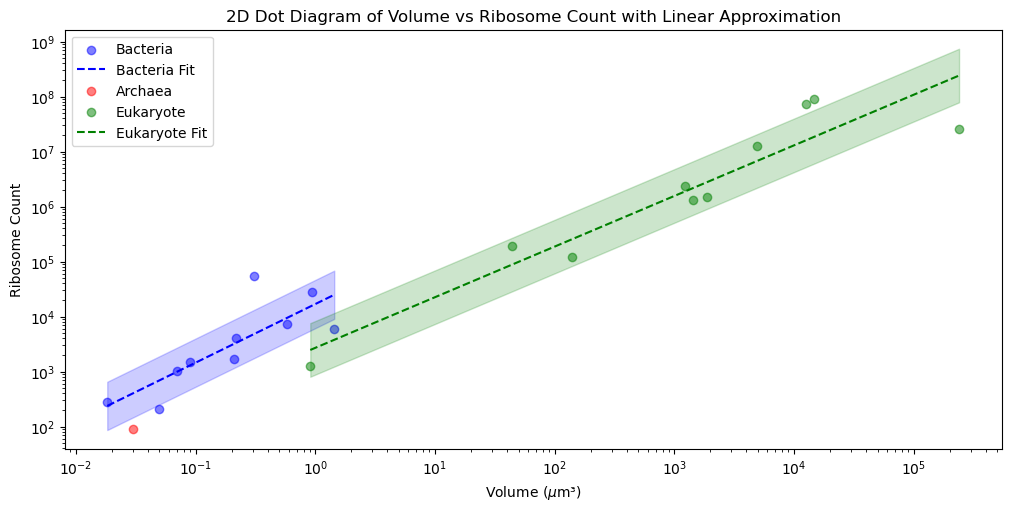

In [49]:
# Define colors for each type
colors = {'Archaea': 'red', 'Bacteria': 'blue', 'Eukaryote': 'green'}

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

for t in data['Name'].unique():
    subset = data[data['Name'] == t]
    ax.scatter(subset['Volume'], subset['Ribosome'], label=t, color=colors[t], alpha=0.5)

    # Ensure columns are numeric
    subset['Volume'] = pd.to_numeric(subset['Volume'], errors='coerce')
    subset['Ribosome'] = pd.to_numeric(subset['Ribosome'], errors='coerce')

    if t == 'Archaea':
        continue

    # Fit a linear model
    log_volume = np.log10(subset['Volume'])
    log_ribosome = np.log10(subset['Ribosome'])
    coeffs = np.polyfit(log_volume, log_ribosome, 1)
    fit_line = np.poly1d(coeffs)

    # Plot the linear fit
    x_fit = np.linspace(log_volume.min(), log_volume.max(), 100)
    y_fit = fit_line(x_fit)
    ax.plot(10**x_fit, 10**y_fit, color=colors[t], linestyle='--', label=f'{t} Fit')

    # Calculate error bounds
    y_fit_upper = y_fit + np.std(log_ribosome - fit_line(log_volume))
    y_fit_lower = y_fit - np.std(log_ribosome - fit_line(log_volume))
    ax.fill_between(10**x_fit, 10**y_fit_lower, 10**y_fit_upper, color=colors[t], alpha=0.2)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Volume ($\mu$m³)')
ax.set_ylabel('Ribosome Count')
ax.set_title('2D Dot Diagram of Volume vs Ribosome Count with Linear Approximation')

ax.legend()

plt.show()